<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/201005_10%EC%9E%A5_%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# __분산분석__

# 1.분산분석 기초
- 분산분석 = ANOVA(Analysis of Variance)
- __명목척도로 구성된 독립변수__, __등간척도__ or __비율척도로 구성된 종속변수__ 사이의 관계를 __3개 이상 집단간 평균의 차이__로 검정할 때 사용
- 평균을 비교하는 집단의 수가 2개 이하일 경우에는 t-검정 or z-검정

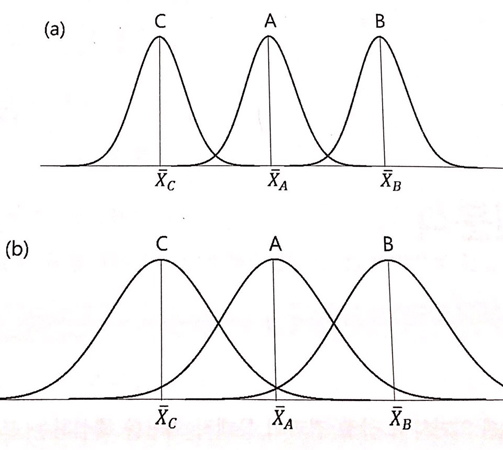

- (a): 집단 A, B, C간 겹치는 부분이 거의 없음. 즉, 유의미한 평균 차이가 있음.
- (b): 집단 A, B, C간 겹치는 부분이 많음. 즉, 유의미한 평균 차이가 있다고 보기 어려움.
- __집단간 분산, 집단 내 분산__을 이용하여 평균 차이를 판단해야 함
  + (a)의 경우 집단간 분산 > 집단 내 분산

## 1.1.분산분석의 종류

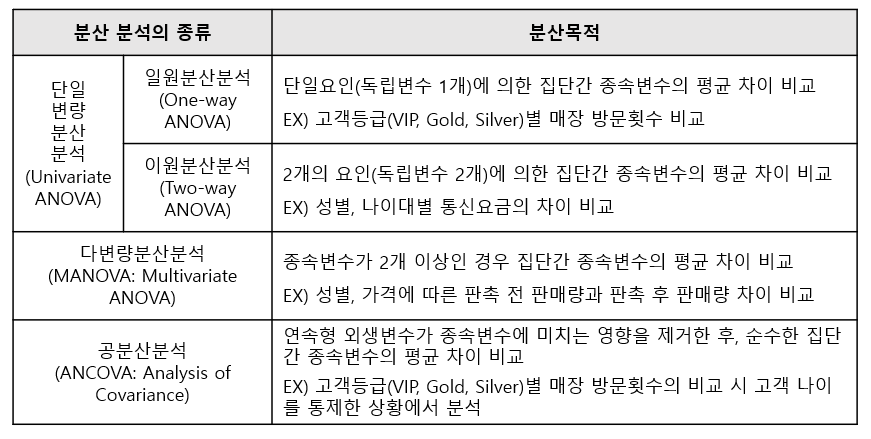

- 사후분석
  + __분산분석 후 구체적으로 어떤 집단끼리가 유의한 차이를 보이는지__ 비교할 수 있는 방법
  + __분산분석의 귀무가설(각 집단의 평균은 동일하다)의 기각여부와 상관없이__ 수행 가능
  + 귀무가설이 기각되지 않는 자료에 대해서 사후분석 진행시, 집단간의 모평균 차이를 분석
- 사후분석의 종류
  + __Fisher의 최소유의차(LSD)__: 등분산을 가정하는 방법. 귀무가설이 기각된 경우 사용. 집단별 표본 크기가 다른 경우에도 적용 가능
  + __Tukey의 정직유의차(HSD)__: LSD 보다 엄격. 검정력이 떨어지므로 유의수준 0.1 이상으로 설정. 집단별 표본 크기가 같은 경우에만 적용
  + __Scheffe 방법__: 일반적이고 융통성 있는 방법. 집단별 표본 크기가 다른 경우에도 적용 가능. 넓은 신뢰구간을 제시하는 단점 존재
  + __Duncan 방법__: 등분산을 가정하는 방법. 1종 오류를 범할 가능성이 높다는 단점 존재

# 2.일원분산분석

## 2.1.개념 및 주요 이론

- 분산분석의 검정통계량 값 = F값
- F값 = 집단내 분산 대비 집단간 분산이 몇 배 더 큰지를 나타내는 값
- __F값 > 임계치__: 집단 간 차이가 충분히 크다
- 자료의 수에도 영향을 받기 때문에 각 편차 제곱의 합을 자유도로 나눈 표준화 값인 __제곱 합의 평균__을 이용

- __집단내 분산(SSB)__: 각 집단의 평균치를 중심으로 __각 집단의 자료들이 우연적인 오차에 의해 어떻게 흩어져 있는가__를 요약하는 척도
- __집단간 분산(SSW)__: 각 __집단의 평균들이 전체 평균으로부터 흩어진 정도__를 나타내는 척도
- __총 분산(SST)__: 각 자료들이 전체 평균으로부터 흩어진 정도를 나타내는 척도

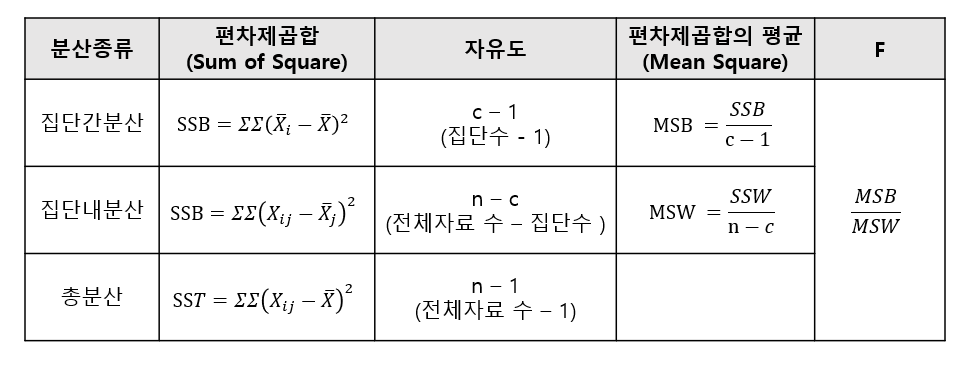

- F검정을 수행할 경우 Mean, DF(자유도), f-value, p-value 등 확인해야 함

## 2.2.분석 및 해석
- 쇼핑몰은 고객들의 구매유형별 총 매출액의 차이가 있는지를 일원분산분석을 통해 검정
- 귀무가설 = 쇼핑몰 고객의 구매유형에 따른 총 매출액의 차이는 없다
- 연구가설 = 쇼핑몰 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다

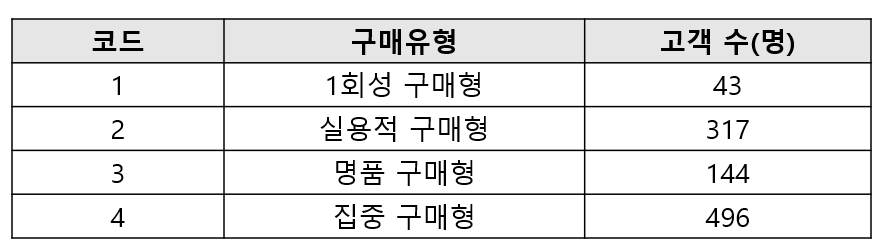

- 신뢰수준 95%(유의수준 0.05)로 전제할 때, 분모자유도 무한대, 분자 자유도 3 가정할 시 F값은 2.60
- F값이 2.60 이상이면 귀무가설 기각 및 연구가설 채택

In [ ]:
!pip install pingouin

In [ ]:
!pip install scikit-posthocs

In [5]:
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs    # 사후분석을 위한 Tukey의 정직유의차, Scheffe 방법 등 지원

df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [6]:
pd.options.display.float_format='{:.3f}'.format   # 출력할 소숫점의 자리수 지정
df1 = df[['구매유형','총_매출액']]
df1.head()

,구매유형,총_매출액
0,4,4007080
1,4,3168400
2,4,2680780
3,4,5946600
4,2,13745950


In [7]:
# 등분산검정
구매유형 = []
for i in range(1,5,1):
  구매유형.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(구매유형[0],구매유형[1],구매유형[2],구매유형[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

- 등분산검정을 먼저 실시
- 구매유형별로 총 매출액을 분류 후 각 유형별 분산을 비교
- f-value는 61.83, p-value는 0.01 미만으로, 귀무가설 기각.
- 즉, 4개의 집단의 분산은 동일하지 않음(등분산이 아님)

In [8]:
# Welch 일원분산분석
pg.welch_anova(data=df1,dv='총_매출액',between='구매유형')

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


- 등분산이 아닐 때, Welch 일원분산분석을 이용 __(dv=종속변수, between=독립변수)__
- f-value는 88.23, p-value는 0.01 미만으로 출력[링크 텍스트]


In [9]:
# 사후분석
df1['구매유형'] = df['구매유형'].astype('str')
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액',group_col='구매유형'))
print('-'*50)

# 구매유형별 평균 총매출액
print(구매유형[0].mean(), 구매유형[1].mean(),구매유형[2].mean(),구매유형[3].mean())
print('-'*50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
--------------------------------------------------
3403682.3255813955 9612645.078864353 11779839.652777778 4392794.395161291
--------------------------------------------------


- 각 집단별 표본의 개수가 다르므로 Scheffe 방법을 사용 __(val_col=종속변수, group_col=독립변수)__
- 구매유형은 범주형 데이터이므로 문자열로 변환하여 group_col에 지정(수치형 일시 오류 발생)
- 구매유형(1)과 구매유형(4)를 제외한 나머지 구매유형 그룹간에는 유의한 차이가 나타남
- 평균매출액은 구매유형(3)>구매유형(2)>구매유형(4)>구매유형(1) 순으로 출력

- f-value 88.23, p-value 0.01 미만으로, 연구가설(쇼핑몰 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재)를 채택
- 사후분석표를 통해 구매유형(1)과 구매유형(4) 고객들간 총 매출액 차이는 없지만(약 90만), 나머지 집단간의 매출액 차이는 유의함

# 3.이원분산분석

## 3.1.개념 및 주요 이론
- 이원분산분석: 2개의 요인(독립변수 2개)에 의한 집단간 종속변수의 평균 차이 비교
- 일원분산분석과는 달리 독립변수가 2개이므로, __독립변수들간 상호작용 효과를 판단__해야 함
- __상호작용__
  + 종속변수에 대한 독립변수들의 결합효과
  + 종속변수에 대한 독립변수A의 효과가 독립변수B의 각 수준에서 동일하지 않음을 의미
  + 독립변수A,B간 상호작용이 존재하지 않으면 각각 일원분산분석을 수행하는 것과 동일

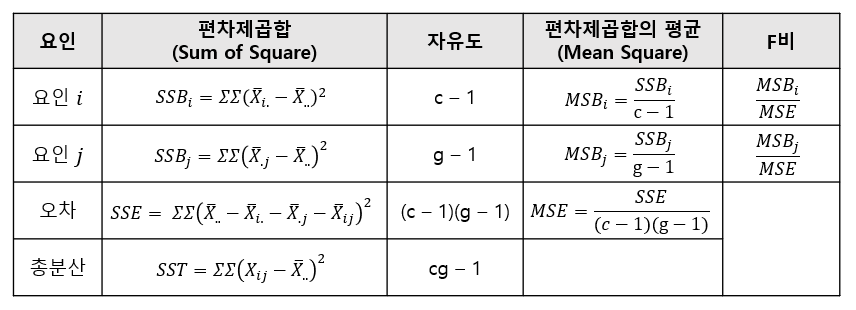

## 3.2.분석 및 해석
- 구매유형과 거주지역에 따라 고객들의 총 매출액이 다른지 검정
- 제 1 독립변수의 효과, 제 2 독립변수의 효과, 상호작용 효과 가설로 나눠 검정

__구매유형에 따른 매출액 차이 가설__
- 귀무가설 = 구매유형에 따른 총 매출액의 차이는 없다
- 연구가설 = 적어도 1개의 구매유형이 다른 구매유형과 총 매출액의 차이가 존재한다


__거주지역에 따른 매출액 차이 가설__
- 귀무가설 = 거주지역에 따른 총 매출액의 차이는 없다
- 연구가설 = 적어도 1개의 거주지역이 다른 거주지역과 총 매출액의 차이가 존재한다


__독립변수간 상호작용에 대한 가설__
- 귀무가설 = 구매유형과 거주지역의 상호작용 효과는 없다
- 연구가설 = 구매유형과 거주지역의 상호작용 효과가 있다

In [10]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.000,6.000,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.000,nan,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.000,nan,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.000,6.000,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.000,6.000,5,6,6,6,5,5,6,6,5,6


In [11]:
pd.options.display.float_format='{:.3f}'.format
df1=df[['총_매출액','구매유형','거주지역']]
df1.head()

,총_매출액,구매유형,거주지역
0,4007080,4,6
1,3168400,4,4
2,2680780,4,6
3,5946600,4,5
4,13745950,2,6


In [12]:
# 이원분산분석
pg.anova(data=df1, dv='총_매출액',between=['구매유형','거주지역'])

,Source,SS,DF,MS,F,p-unc,np2
0,구매유형,6318565682974362.000,3.000,2106188560991454.000,64.046,0.000,0.164
1,거주지역,16139868513734124.000,6.000,2689978085622354.000,81.798,0.000,0.335
2,구매유형 * 거주지역,3867936213048951.000,18.000,214885345169386.156,6.534,0.000,0.108
3,Residual,32096439113329668.000,976.000,32885695812837.773,nan,nan,nan


- anova()를 사용하여 분산분석 실시 (between에 독립변수 하나만 지정시 일원분석)
- __구매유형__ f-value 63.18, p-value 0.01 미만 출력
- __거주지역__ f-value 81.80, p-value 0.01 미만 출력
- __두 변수 간 상호작용__ f-value 6.53, p-value 0.01 미만 출력
- 즉, 모든 귀무가설 기각 및 연구가설 채택

In [13]:
# 사후분석
df1['구매유형'] = df['구매유형'].astype('str')
df1['거주지역'] = df['거주지역'].astype('str')
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액',group_col='구매유형'))
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액',group_col='거주지역'))

      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
      6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- 사후분석
  - __구매유형__: 구매유형(1)과 구매유형(4)를 제외한 나머지 유형간의 총 매출액 차이가 유의
  - __거주지역__: 2와 7 / 3과 6 / 3과 7 / 4와 6 / 4와 7 / 5와 6 / 5와 7 / 6과 7 그룹간의 총 매출액 차이가 유의

In [14]:
# 구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1,index='구매유형',columns='거주지역',values='총_매출액',aggfunc=np.mean)

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,nan,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,nan,nan,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,nan,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


- 구매유형, 거주지역별 총 매출액 평균 출력

- 이원분산분석 결과 모든 귀무가설 기각 및 연구가설 채택
- 즉, __매출액은 구매유형에 따라, 거주지역에 따라 달라진다고 볼 수 있으며, 구매유형과 거주지역 간의 상호작용 효과 또한 유의__
- 특정 구매유형 + 특정 거주지역의 경우 다른 영역에 비해 큰 매출액 차이를 보임
  + 예: 거주지역(7) + 구매유형(3)은 타 영역에 비해 상당히 큰 매출액 보임

# 4.다변량분산분석

## 4.1.개념 및 주요 이론
- 다변량분산분석 = MANOVA
- MANOVA는 집단간 평균을 비교할 때(분산분석),__모집단에 대해 여러 상황을 제시하고 여러 개의 변수를 동시에 관찰할 때__ 유용
- __종속변수(벡터변수)에 의해 구성된 공간에서 평균이 같은지__ 조사하는 분석
- __상관관계__
  + 종속변수가 2개이므로 __종속변수간 상관관계 여부__ 파악 필요
  + 종속변수간 상관관계가 없으면 단일변량 분산분석으로 각각 분석 진행

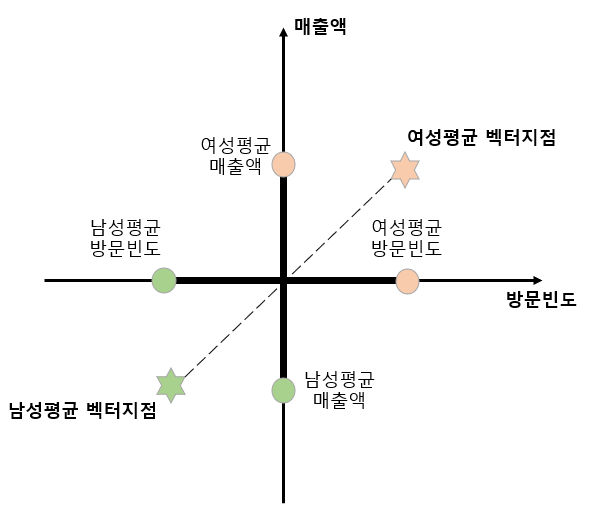

- 매출액과 방문빈도로 이루어진 남성평균 벡터와 여성평균 벡터를 2차원상의 점으로 표현
- __두 벡터간의 거리를 검증하는 것__ = 다변량분산분석

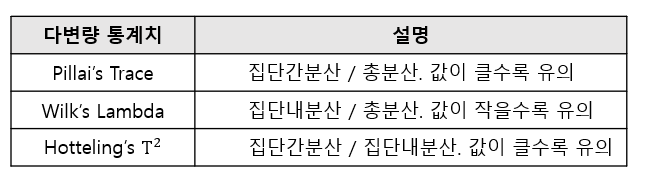

## 4.2.분석 및 해석
- 쇼핑몰은 다변량분산분석을 통해 구매유형, 거주지역에 따른 방문빈도 및 총 매출액의 차이를 검정
- 귀무가설 = 쇼핑몰 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다
- 귀무가설 = 쇼핑몰 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다

In [15]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.000,6.000,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.000,nan,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.000,nan,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.000,6.000,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.000,6.000,5,6,6,6,5,5,6,6,5,6


In [16]:
# 종속변수간 상관관계 파악
from scipy import stats
stats.pearsonr(df.총_매출액, df.방문빈도)

(0.6311706453193392, 3.0519604496887203e-112)

- 피어슨상관계수 0.63, p-value 0.01 미만으로 __종속변수인 방문빈도와 총매출액간의 상관관계는 유의미__함

In [17]:
from statsmodels.multivariate.manova import MANOVA
pd.options.display.float_format='{:.3f}'.format 

df1 = df[['총_매출액','방문빈도','구매유형','거주지역']]
df1.head()

,총_매출액,방문빈도,구매유형,거주지역
0,4007080,17,4,6
1,3168400,14,4,4
2,2680780,18,4,6
3,5946600,17,4,5
4,13745950,73,2,6


In [18]:
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 + 거주지역', data=df1).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

- __from_formula()__ 함수를 이용해 종속변수와 독립변수를 지정하는 모형 생성
  + 종속변수 ~ 독립변수: ~로 종속변수와 독립변수를 구분
- __mv_test()__ 함수를 이용해 실제로 수행
  + 앞서 설정해놓은 다변량분산분석 가석 검정을 수행해 통계량을 산출

- Intercept = 전체 모형의 적합성
- 전체 모형의 적합성, 거주지역, 구매유형에 대한 __다변량분석모형 모두 유의확률 0.01 미만으로 유의미__함

In [19]:
# 사후분석
df1['구매유형'] = df1['구매유형'].astype('str')
df1['거주지역'] = df1['거주지역'].astype('str')

print('<구매유형 총매출액 사후분석>')
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='구매유형'))
print('-'*50)

print('<거주지역 총매출액 사후분석>')
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='거주지역'))
print('-'*50)

print('<구매유형 방문빈도 사후분석>')
print(scikit_posthocs.posthoc_scheffe(df1,val_col='방문빈도',group_col='구매유형'))
print('-'*50)

print('<거주지역 방문빈도 사후분석>')
print(scikit_posthocs.posthoc_scheffe(df1,val_col='방문빈도',group_col='거주지역'))

<구매유형 총매출액 사후분석>
      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
--------------------------------------------------
<거주지역 총매출액 사후분석>
      6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000
--------------------------------------------------
<구매유형 방문빈도 사후분석>
      4     2     1     3
4 1.000 0.000 0.030 0.998
2 0.000 1.000 0.000 0.000
1 0.030 0.000 1.000 0.075
3 0.998 0.000 0.075 1.000
--------------------------------------------------
<거주지역 방문빈도 사후분석>
      6     4     5     7     3     2     1
6 1.000 0.000 0.000 0.000 0.000 0.005 0.451
4 0.000 1.000 0.913 0.000 0.370 0.604 0.949
5 0.000 0.913 1.000 0.000 0.040 0.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- 총매출액 사후분석
  + __구매유형__: 구매유형(1)과 구매유형(4)를 제외한 나머지 구매유형 그룹간에는 유의한 차이가 나타남
  + __거주지역__: 2와 7 / 3과 6 / 3과 7 / 4와 6 / 4와 7 / 5와 6 / 5와 7 / 6과 7 그룹간의 총 매출액 차이가 유의
- 방문빈도 사후분석
  + __구매유형__: 구매유형(4)와 구매유형(3) / 구매유형(1)과 구매유형(3)을 제외한 나머지 구매유형 그룹간에는 유의한 차이가 나타남
  + __거주지역__: 1과 7 / 2와 6 / 2와 7 / 3과 5 / 3과  6 / 3과 7 /4와 6 / 4와 7 / 5와 6 / 5와 7 그룹간의 총 매출액 차이가 유의

In [20]:
# 구매유형, 거주지역별 평균 총매출액
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('구매유형, 거주지역별 평균총매출액')
평균총매출액

구매유형, 거주지역별 평균총매출액


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,nan,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,nan,nan,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,nan,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


In [21]:
# 구매유형, 거주지역별 평균 방문빈도
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('구매유형, 거주지역별 평균방문빈도')
평균방문빈도

구매유형, 거주지역별 평균방문빈도


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,nan,8.000,8.667,10.818,10.222,9.667,10.000
2,nan,nan,29.143,42.312,39.022,48.212,58.845
3,7.750,5.000,7.929,11.903,15.350,20.438,40.765
4,nan,12.778,12.485,17.277,18.000,18.768,19.966


구매유형, 거주지역별 평균방문빈도 및 평균총구매액을 산점도로 표현하면 아래와 같다

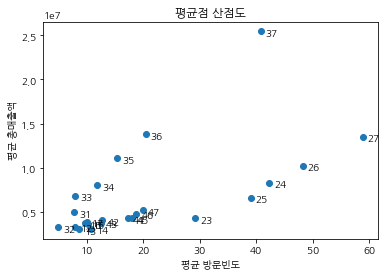

In [28]:
X = np.hstack(평균방문빈도.values[0:4])     # X에는 4*7=28 개가 일렬로 붙은 28*1 행렬 생성
Y = np.hstack(평균총매출액.values[0:4])     # Y에는 4*7=28 개가 일렬로 붙은 28*1 행렬 생성

# label 생성
label = []
for i in range(1,5,1):    
  for j in range(1,8,1):
    label.append(str(i)+str(j))

# label을 그래프에 입력
for label, x_count, y_count in zip(label,X,Y):     
  plt.annotate(label, xycoords='data',textcoords='offset points', xy=(x_count, y_count), xytext=(5,-5))
                      # xycoords(x와 y축의 좌표체계) = 실제 데이터
                      # textcoords(주석이 찍히는 좌표체계) = 포인트 단위
                      # xytext(좌표로부터 텍스트가 얼마나 떨어져 있는지)

plt.title('평균점 산점도')
plt.xlabel('평균 방문빈도')
plt.ylabel('평균 총매출액')
plt.plot(X,Y,'o')

- 거주지역, 구매유형에 따라 총 매출액과 방문빈도의 차이는 모두 유의한 것으로 나타남
- 구매유형(3,2)인 고객들은 상대적으로 다른 유형들보다 평균 방문빈도가 높음
- 거주지역(4,5,6,7) 고객들은 상대적으로 다른 지역 고객들보다 평균 총매출액이 높음
- 특히, 구매유형(3) + 거주지역(7)과 구매유형(2) + 거주지역(7)인 고객들은 큰 차이를 보임 > 세그먼트 적합한 마케팅 전략 추진

# 5.공분산분석

## 5.1.개념 및 주요 이론
- __공분산분석(ANCOVA)__ 
  + __독립변수(수치형변수)__에 따라 __종속변수(수치형변수)__의 차이가 발생하는지 검정
  + 일반 분산분석에서 종속변수에 영향을 줄 수 있는 연속형 외생변수의 효과를 제거한 후 순수히 집단간 종속변수의 평균차이를 분석
  + 회귀분석의 변형이기도 함
- __일반적인 분산분석__
  + __독립변수(명목형변수)__에 따라 __종속변수(수치형변수)__의 차이가 발생하는지 검정 

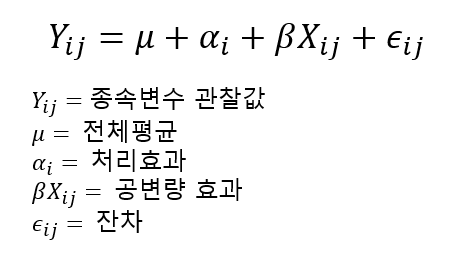

- 잔차부분이 없다면 일반적인 회귀분석 모형과 동일
- 공변량 효과부분이 없다면 일반적인 분산분석 모형과 동일

- __분산분석의 변형으로서 공분산분석__
  + 상황: 범주형 독립변수가 종속변수의 평균의 차이에 미치는 영향을 보되, 연속형 변수(공변량)의 효과를 고려할 경우
  + 일반적인 분산분석의 경우 범주형변수 외에도 공변량(양적인 독립변수)의 영향을 받아 유의미하게 나타날 수 있음
  + 그러므로, 공분산분석은 범주형 변수만 고려한 분산분석의 과정에서 생겨날 수 있는 문제점을 보완해줌
  + 이때, 공변량(연속형 독립변수)를 통제하고, 순수히 명목형 독립변수의 요인의 효과를 분석
  + __공분산분석 단계__
        1. 등간 or 비율척도로 측정된 독립변수와 종속변수간 관계를 파악
        2. 공변량이 종속변수에 미치는 효과가 있다면 이를 제거
        3. 수정된 종속변수의 평균값을 이용하여 분산분석 실시

- __회귀분석에서 범주형 변수를 통제하는 분석__
  + 상황: 연속형 종속변수와 연속형 독립변수간의 회귀분석 과정을 보되, 범주형 변수의 효과가 개입될 경우
  + 두 연속형 변수간 회귀분석모형만 고려하는 경우 생겨날 수 있는 문제점 보완
  + 즉, 범주형 변수에 따라 회귀직선이 적합되는 것이 바람직한지 판단 후 범주에따라 회귀분석 수행
  + 회귀분석에서 공분산분석 외에도 다중회귀분석 존재(범주형변수를 더미변수로 전환하여 활용)

- __공변량 통제의 의미__
  - 가정: CRM 대상 고객그룹과 CRM 비대상 고객그룹의 연평균 구매액의 차이 비교
  - 그림A(공변량 통제 전)
    + 고객들의 해당기업과의 거래년수를 고려하지 않고, 단순히 두 그룹간의 평균구매액 차이만 분석
    + 즉, 고객들의 구매액의 차이가 CRM 효과 뿐만 아니라 총 거래년수에 의해서도 영향을 받았다면 CRM의 순수한 효과 판단하기 어려움
  - 그림B(공변량 통제 후)
    + 거래년수 = 공변량
    + 공변량 통제 = 두 집단의 거래년수 차이가 없도록 거래연수에 대한 조정평균을 구함
   + 공변량 통제 전보다 통제 후의 두 집단간 연평균 구매액 차이가 줄어듦


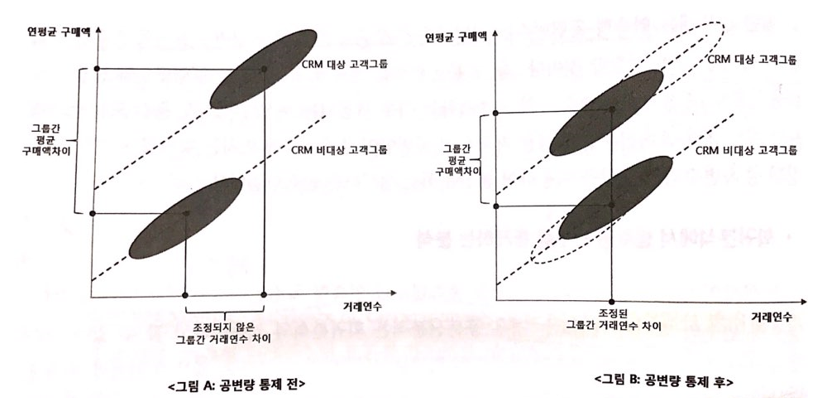

- __공분산분석의 종류__
  + 일원공분산분석 = 공변량 외의 독립변수가 1개
  + 다원 공분산분석 = 공변량 외의 독립변수가 2개 이상
  + 다변량 공분산분석 = 종속변수가 2개 이상인 공분산분석

## 5.2.분석 및 해석
- 앞서 거주지역별 총 매출액의 차이를 일원분산분석을 통해 검증
- 그러나, 거주지역외에도 고객들의 방문빈도 역시 유의미한 변수일 수 있음
- __공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액의 차이를 검증__


- 귀무가설 = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다
- 연구가설 = 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다

In [30]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.000,6.000,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.000,nan,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.000,nan,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.000,6.000,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.000,6.000,5,6,6,6,5,5,6,6,5,6


In [32]:
pd.options.display.float_format='{:.3f}'.format
df1 = df[['총_매출액','방문빈도','거주지역']]
df1.head()

,총_매출액,방문빈도,거주지역
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6


In [33]:
# 공분산분석
pg.ancova(dv='총_매출액',between='거주지역', covar='방문빈도', data=df1)

,Source,SS,DF,F,p-unc,np2
0,거주지역,696696841274948.000,6,4.046,0.001,0.024
1,방문빈도,13701443685723464.000,1,477.393,0.000,0.325
2,Residual,28470960329516344.000,992,nan,nan,nan


In [34]:
# 일원분산분석
pg.anova(dv='총_매출액',between='거주지역',data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,거주지역,6,993,24.759,0.000,0.130


- 공변량 통제 후인 __공분산분석__은 f-value 4.046, p-value 0.01 미만으로 출력
- 공변량 통제 전인 __일원분산분석__은 f-value 24.78, p-value 0.01 미만으로 출력
- 두 f-value의 값의 차이를 통해, __방문빈도 또한 총 매출액에도 일정한 영향을 주고 있음__을 알 수 있음
- 즉, 방문빈도를 통제하지 않으면 거주지역별 차이가 과대평가 될 수 있음